In [6]:
# Setup
from mlwpy import *
%matplotlib inline
diabetes = datasets.load_diabetes()
tts = skms.train_test_split(diabetes.data,
diabetes.target,
test_size=.25,
random_state=42)
(diabetes_train_ftrs, diabetes_test_ftrs,
diabetes_train_tgt,
diabetes_test_tgt) = tts

In [7]:
ape_df = pd.DataFrame({'predicted' : [4, 2, 9],
'actual'
: [3, 5, 7]})
ape_df['error'] = ape_df['predicted'] - ape_df['actual']
ape_df['resid'] = ape_df['actual'] - ape_df['predicted']

In [8]:
def regression_residuals(ax, predicted, actual, show_errors=None, right=False):
	''' figsize -> subplots;
	predicted/actual data -> columns of a DataFrame
	errors -> "all" or sequence of indices '''
	df = pd.DataFrame({'actual': actual, 'predicted': predicted})
	df['error'] = df.actual - df.predicted
	ax.plot(df.predicted, df.error, '.')
	ax.plot(df.predicted, np.zeros_like(predicted), '-')
	if right:
		ax.yaxis.tick_right()
		ax.yaxis.set_label_position("right")
	ax.set_xlabel('Predicted Value')
	ax.set_ylabel('Residual')
	if show_errors == 'all':
		show_errors = range(len(df))
	if show_errors:
		preds = df.predicted.iloc[show_errors]
		errors = df.error.iloc[show_errors]
		ax.vlines(preds, 0, errors, 'r')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.plot(ape_df.predicted, ape_df.actual, 'r.', [0, 10], [0, 10], 'b-')  # pred vs actual
# perfect line
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
regression_residuals(ax2, ape_df.predicted, ape_df.actual, 'all', right=True)

In [9]:
from sklearn import linear_model, neighbors

lr = linear_model.LinearRegression()
knn = neighbors.KNeighborsRegressor()
models = [lr, knn]
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
fig.tight_layout()
for model, ax, on_right in zip(models, axes, [False, True]):
	preds = (model.fit(diabetes_train_ftrs, diabetes_train_tgt)
			 .predict(diabetes_test_ftrs))
	regression_residuals(ax, preds, diabetes_test_tgt, [-20], on_right)
axes[0].set_title('Linear Regression Residuals')
axes[1].set_title('k-NN-Regressor Residuals');

In [1]:
print(diabetes_test_tgt[-20])

NameError: name 'diabetes_test_tgt' is not defined

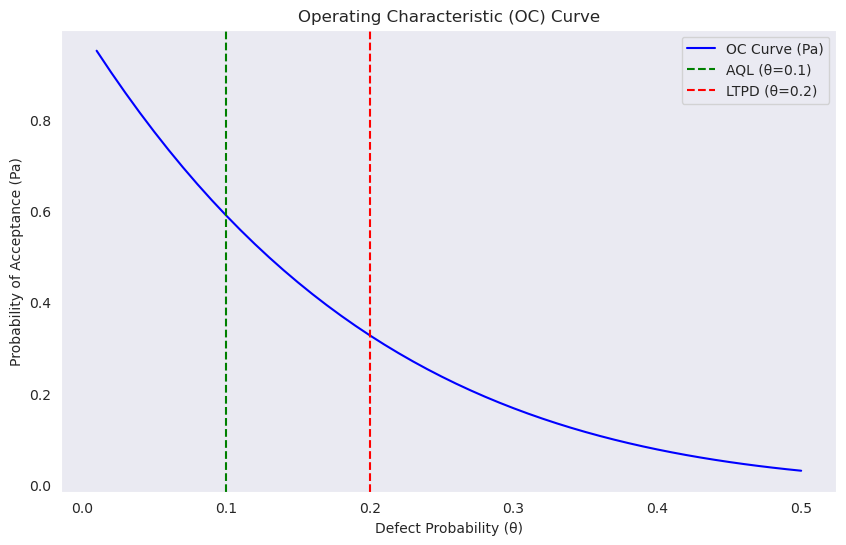

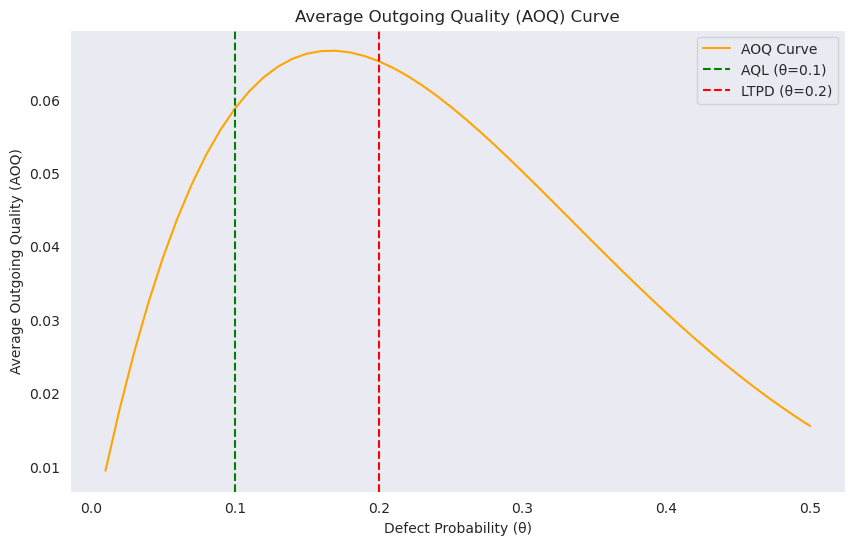

(0.40951000000000004, 0.3276799999999999)

In [8]:
# Re-importing necessary libraries after environment reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
N = 1000   # Lot size
n = 5      # Sample size
c = 0      # Acceptance number
alpha = 0.05  # Producer's risk
theta_values = np.arange(0.01, 0.51, 0.01)  # Defect probabilities (0.01 to 0.5)

# Function to calculate Pa(p) using the binomial distribution
def calculate_pa(theta, n, c):
	return binom.cdf(c, n, theta)

# Function to calculate AOQ
def calculate_aoq(theta, Pa, N, n):
	return (theta * (N - n) * Pa) / N

# Calculate Pa and AOQ values
Pa_values = [calculate_pa(theta, n, c) for theta in theta_values]
AOQ_values = [calculate_aoq(theta, Pa, N, n) for theta, Pa in zip(theta_values, Pa_values)]

# Find Producer's and Consumer's Risk
producers_risk = 1 - calculate_pa(0.1, n, c)  # Risk at AQL (theta_1 = 0.1)
consumers_risk = calculate_pa(0.2, n, c)      # Risk at LTPD (theta_2 = 0.2)

# Plotting the OC curve
plt.figure(figsize=(10, 6))
plt.plot(theta_values, Pa_values, label="OC Curve (Pa)", color="blue")
plt.axvline(0.1, color="green", linestyle="--", label="AQL (θ=0.1)")
plt.axvline(0.2, color="red", linestyle="--", label="LTPD (θ=0.2)")
plt.title("Operating Characteristic (OC) Curve")
plt.xlabel("Defect Probability (θ)")
plt.ylabel("Probability of Acceptance (Pa)")
plt.grid()
plt.legend()
plt.show()

# Plotting the AOQ curve
plt.figure(figsize=(10, 6))
plt.plot(theta_values, AOQ_values, label="AOQ Curve", color="orange")
plt.axvline(0.1, color="green", linestyle="--", label="AQL (θ=0.1)")
plt.axvline(0.2, color="red", linestyle="--", label="LTPD (θ=0.2)")
plt.title("Average Outgoing Quality (AOQ) Curve")
plt.xlabel("Defect Probability (θ)")
plt.ylabel("Average Outgoing Quality (AOQ)")
plt.grid()
plt.legend()
plt.show()

(producers_risk, consumers_risk)


In [9]:
      sampling_table = pd.DataFrame({'p_values': theta_values, 'Pa': Pa_values, 'AOQ': AOQ_values})
sampling_table

,p_values,Pa,AOQ
0,0.01,0.950990,0.009462
1,0.02,0.903921,0.017988
2,0.03,0.858734,0.025633
3,0.04,0.815373,0.032452
4,0.05,0.773781,0.038496
5,0.06,0.733904,0.043814
6,0.07,0.695688,0.048455
7,0.08,0.659082,0.052463
8,0.09,0.624032,0.055882
9,0.10,0.590490,0.058754


In [7]:
print(calculate_pa(0.0, n, c))

1.0


In [11]:
import math
from scipy.stats import poisson

# Define parameters
p0 = 0.01  # AQL
p1 = 0.04  # LTPD
alpha = 0.05  # Producer's risk
beta = 0.10  # Consumer's risk

# Function to calculate cumulative Poisson probability
def poisson_cdf(c, lam):
	return sum((math.exp(-lam) * lam**k / math.factorial(k)) for k in range(c + 1))

# Find n and c
for c in range(0, 10):  # Iterate over possible acceptance numbers
	for n in range(10, 200):  # Iterate over sample sizes
		lam0 = n * p0
		lam1 = n * p1
		Pa0 = poisson_cdf(c, lam0)  # Probability of acceptance at AQL
		Pa1 = poisson_cdf(c, lam1)  # Probability of acceptance at LTPD
		if Pa0 >= 1 - alpha and Pa1 <= beta:
			print(f"Sample size: {n}, Acceptance number: {c}")
			break
